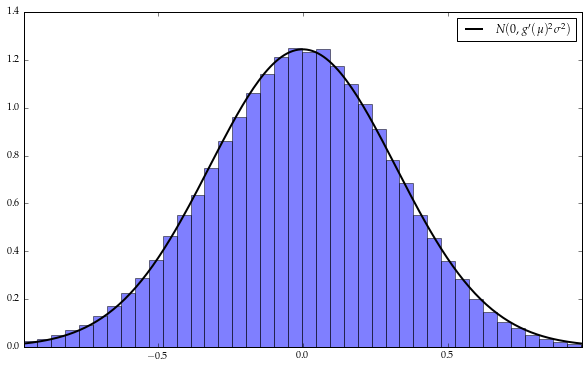

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm
from matplotlib import rc

#==specifying font, needs LaTex integration==#
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

#==set parameters==#
n = 250
replications = 100000
distribution = uniform(loc=0, scale=(np.pi /2))
mu, s = distribution.mean(), distribution.std()

g = np.sin
g_prime =np.cos

#==generate obs of sqrt{n} (g(\bar X_n) - g(\mu))==#
data = distribution.rvs((replications, n))
sample_means = data.mean(axis=1) #compute mean of each row
error_obs = np.sqrt(n) *(g(sample_means) - g(mu))

#==plot==#
asymptotic_sd = g_prime(mu) * s
fig, ax =plt.subplots(figsize=(10, 6))
xmin = -3 * g_prime(mu) *s
xmax= -xmin
ax.set_xlim(xmin, xmax)
ax.hist(error_obs, bins=60, alpha=0.5, normed=True)
xgrid = np.linspace(xmin, xmax, 200)
lb = r"$N(0, g'(\mu)^2 \sigma^2)$"
ax.plot(xgrid, norm.pdf(xgrid, scale=asymptotic_sd), 'k-', lw=2, label=lb)
ax.legend()
plt.show()

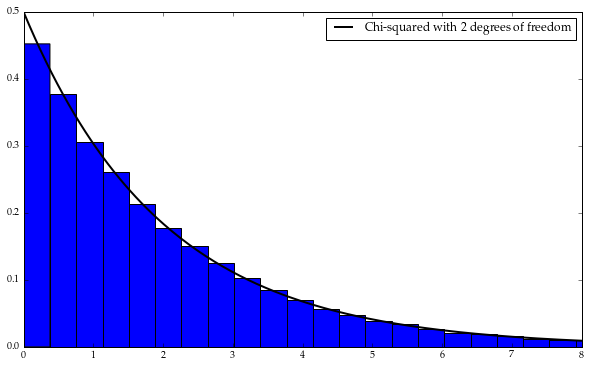

In [7]:
from scipy.stats import uniform, chi2
from scipy.linalg import inv, sqrtm

#==set parameters==#
n = 250
replications = 50000
dw = uniform(loc=-1, scale=2) #uniform(-1, 1)
du = uniform(loc=-2, scale=4) #uniform(-2, 2)
sw, su = dw.std(), du.std()
vw, vu = sw**2, su**2
Sigma = ((vw, vw), (vw, vw+vu))
Sigma = np.array(Sigma)

#==compute Sigma^{-1/2}==#
Q = inv(sqrtm(Sigma))

#==generate observations of the normalized sample mean==#
error_obs = np.empty((2, replications))
for i in range(replications):
    #==generate one sequence of bivariate shocks==#
    X = np.empty((2, n))
    W = dw.rvs(n)
    U = du.rvs(n)
    #==construct the n observations of the random vector==#
    X[0, :] = W
    X[1, :] = W +U
    #==construct the i-th observation of Y_n ==#
    error_obs[:, i] = np.sqrt(n) * X.mean(axis=1)
    
#==premultiply by Q and then take the squared norm==#
temp = np.dot(Q, error_obs)
chisq_obs = np.sum(temp**2, axis=0)

#==plot==#
fig, ax = plt.subplots(figsize=(10, 6))
xmax = 8
ax.set_xlim(0, xmax)
xgrid = np.linspace(0, xmax, 200)
lb = "Chi-squared with 2 degrees of freedom"
ax.plot(xgrid, chi2.pdf(xgrid, 2), 'k-', lw=2, label=lb)
ax.legend()
ax.hist(chisq_obs, bins=50, normed=True)
plt.show()